In [30]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,PowerTransformer
import math  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [31]:
# Verileri ayrı ayrı işeme girme
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
data =pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
train= pd.read_csv("Train.csv")
test =pd.read_csv("Test.csv")

In [32]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [33]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [35]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [36]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [37]:
df.info

<bound method DataFrame.info of       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FA

In [38]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [39]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [40]:
## encoder işlemi uygulluyrouz
encoder = LabelEncoder()
df["Gender"]=encoder.fit_transform(df["Gender"])
df["SMOKE"]=encoder.fit_transform(df["SMOKE"])
df["SCC"]=encoder.fit_transform(df["SCC"])
df["FAVC"]
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [41]:
df['SMOKE'] = encoder.inverse_transform(df['SMOKE'])

In [42]:
for column in df.columns:
    if df[column].dtype == "float64" and column != "Height":
        df[column]=df[column].astype(int)
        
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.620000,64,yes,no,2,3,Sometimes,no,2,0,0,1,no,Public_Transportation,Normal_Weight
1,0,21,1.520000,56,yes,no,3,3,Sometimes,yes,3,1,3,0,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.800000,77,yes,no,2,3,Sometimes,no,2,0,2,1,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.800000,87,no,no,3,3,Sometimes,no,2,0,2,0,Frequently,Walking,Overweight_Level_I
4,1,22,1.780000,89,no,no,2,1,Sometimes,no,2,0,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1.710730,131,yes,yes,3,3,Sometimes,no,1,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,21,1.748584,133,yes,yes,3,3,Sometimes,no,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,22,1.752206,133,yes,yes,3,3,Sometimes,no,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24,1.739450,133,yes,yes,3,3,Sometimes,no,2,0,1,0,Sometimes,Public_Transportation,Obesity_Type_III


In [43]:
max_weight=df.groupby("Weight")["Height"].count().sort_values(ascending=False).head(6)
max_weight_df = pd.DataFrame({'Weight': max_weight.index, 'Count': max_weight.values})
max_weight_df

,Weight,Count
0,80,91
1,75,62
2,82,61
3,50,59
4,111,53
5,104,50


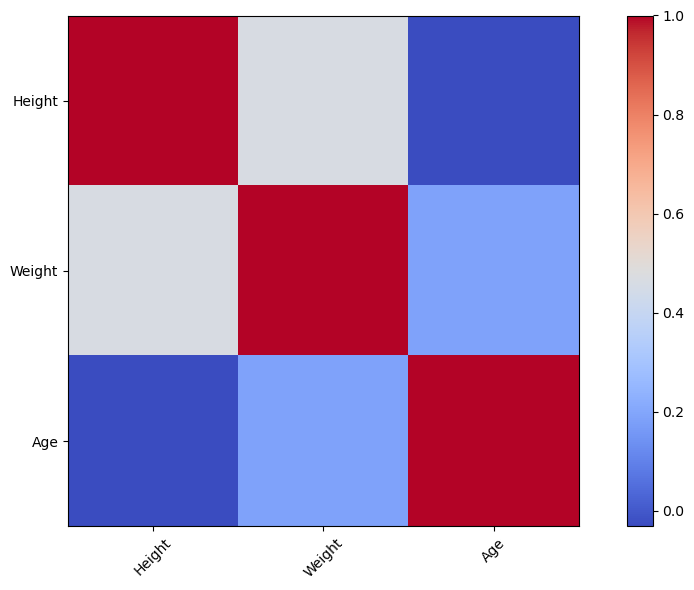

In [44]:
## kolerasyon matrisine bakmak istedim
correlation=df[["Height","Weight","Age"]].corr()
plt.figure(figsize=(10, 6))
plt.imshow(correlation,cmap="coolwarm",interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)
plt.tight_layout()
plt.show()

In [45]:
df2=df[["SMOKE","FAVC","family_history_with_overweight","CAEC","Age"]]

In [46]:
categ_col = df2.select_dtypes(include = ['object']).columns
print(categ_col)


Index(['SMOKE', 'FAVC', 'family_history_with_overweight', 'CAEC'], dtype='object')


In [47]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [48]:
# Kategorik Verilerin Sayısallaştırılması ve Etiket Kodlama
columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
train=pd.get_dummies(train,columns=columns,drop_first=True,dtype=int)
test=pd.get_dummies(test,columns=columns,drop_first=True,dtype=int)


le=LabelEncoder()
a=['CAEC','CALC','MTRANS']
for i in a:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

train['NObeyesdad']=le.fit_transform(train['NObeyesdad'])

In [49]:
train["NObeyesdad"].value_counts()

NObeyesdad
4    4046
3    3248
1    3082
2    2910
0    2523
6    2522
5    2427
Name: count, dtype: int64

In [50]:
# Sayısal Verilerin Güç Dönüşümü ile Ölçeklenmesi (PowerTransformer: Normal dağılım için)
pt = PowerTransformer(method='yeo-johnson')
train_features = train.drop('NObeyesdad', axis=1)
train_features_scaled = pt.fit_transform(train_features)

train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_scaled['NObeyesdad'] = train['NObeyesdad']

In [51]:
train_scaled


,id,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,NObeyesdad
0,-2.193746,0.392273,0.001826,-0.180944,-0.882621,0.182365,0.261059,1.232230,-1.320341,0.775163,-0.421744,0.359015,1.004152,0.469099,0.30588,-0.109287,-0.185009,6
1,-2.191648,-1.379784,-1.613755,-1.189908,-0.882621,0.217247,-1.923122,-0.084861,0.200903,0.804524,1.560984,-2.041050,-0.995866,0.469099,0.30588,-0.109287,-0.185009,1
2,-2.189850,-1.379784,0.133016,-1.495630,-1.077494,-1.817734,0.261059,-0.232407,0.041157,1.483281,1.560984,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,0
3,-2.188223,-0.403279,0.124665,1.562234,1.072753,0.217247,0.261059,-0.613803,0.696094,0.509587,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,4
4,-2.186712,1.384082,2.427755,0.274031,0.383134,-1.357225,0.261059,-0.118174,1.144539,0.717945,-0.421744,0.359015,1.004152,0.469099,0.30588,-0.109287,-0.185009,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1.553353,0.518774,0.762210,0.993953,0.894011,0.217247,0.261059,0.168581,0.559569,-0.605397,-0.421744,0.359015,1.004152,0.469099,0.30588,-0.109287,-0.185009,3
20754,1.553480,-1.379784,0.116314,-1.503223,1.072753,3.013471,-1.923122,-1.635368,1.171026,0.804524,-0.421744,0.359015,1.004152,-2.131745,0.30588,-0.109287,-0.185009,0
20755,1.553608,-0.649421,1.362528,0.696208,-0.155265,0.217247,0.261059,-0.084861,0.378172,1.034361,1.560984,0.359015,1.004152,0.469099,0.30588,-0.109287,-0.185009,3
20756,1.553736,1.587449,0.001848,-0.110046,0.365801,-1.357225,0.261059,0.156848,-1.320341,0.771840,1.560984,-2.041050,1.004152,0.469099,0.30588,-0.109287,-0.185009,6


In [52]:
#  Aykırı Değerlerin IQR Yöntemiyle Temizlenmesi
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data

train_scaled = remove_outliers(train_scaled)



In [53]:
train_scaled

,id,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,MTRANS,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,NObeyesdad
3,-2.188223,-0.403279,0.124665,1.562234,1.072753,0.217247,0.261059,-0.613803,0.696094,0.509587,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,4
5,-2.185287,-1.329292,0.556150,-1.432450,0.894378,0.217247,0.261059,0.144591,1.112847,0.804524,-0.421744,0.359015,1.004152,0.469099,0.30588,-0.109287,-0.185009,0
9,-2.180163,0.664581,-0.700945,0.894164,1.072753,0.217247,0.261059,0.998422,-1.320341,-0.550412,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,4
10,-2.178984,-0.680313,-0.572321,-0.848176,1.072753,0.217247,0.261059,1.660364,0.200903,-1.169987,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,5
13,-2.175622,-0.280238,0.333977,1.570486,1.072753,0.217247,0.261059,-0.151679,0.654890,0.738822,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20746,1.552458,-1.379784,-1.033903,-0.890037,1.072753,0.217247,0.261059,-0.084861,0.200903,0.804524,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,1
20749,1.552841,0.629183,-0.613896,0.670027,1.072753,0.217247,0.261059,-0.839107,-1.287620,-0.053203,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,4
20751,1.553097,-0.381898,-1.086016,1.633147,1.072753,0.217247,0.261059,1.367950,0.898054,-0.744088,-0.421744,0.359015,-0.995866,0.469099,0.30588,-0.109287,-0.185009,4
20753,1.553353,0.518774,0.762210,0.993953,0.894011,0.217247,0.261059,0.168581,0.559569,-0.605397,-0.421744,0.359015,1.004152,0.469099,0.30588,-0.109287,-0.185009,3


In [54]:
b=['CALC','NCP']
for i in b:
    train=train.drop(i,axis=1)

In [55]:
# Veri Setinin Eğitim ve Test Olarak Bölünmes
X = train_scaled.drop('NObeyesdad', axis=1)
y = train_scaled['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
## Model Kurulumları
rf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1,
                              criterion='gini', bootstrap=True,
                             class_weight=None, ccp_alpha=0.0, max_samples=None)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [57]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, n_estimators=100, max_depth=20, min_samples_split=2, min_samples_leaf=1)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))

c:\Users\melih\.conda\envs\tensorflow2\lib\site-packages\xgboost\core.py:158: UserWarning: [01:26:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9665970772442589
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.92      0.87      0.89        78
           2       0.94      0.91      0.92       106
           3       0.99      0.99      0.99       255
           4       1.00      1.00      1.00       822
           5       0.81      0.86      0.83        90
           6       0.79      0.84      0.81        55

    accuracy                           0.97      1437
   macro avg       0.91      0.91      0.91      1437
weighted avg       0.97      0.97      0.97      1437

Confusion Matrix: [[ 29   2   0   0   0   0   0]
 [  2  68   1   0   0   6   1]
 [  0   0  96   1   0   5   4]
 [  0   0   2 253   0   0   0]
 [  0   0   0   1 820   1   0]
 [  1   4   1   0   0  77   7]
 [  0   0   2   1   0   6  46]]


In [58]:
## Tahmin Sonuçları
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9665970772442589
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        31
           1       0.92      0.87      0.89        78
           2       0.94      0.91      0.92       106
           3       0.99      0.99      0.99       255
           4       1.00      1.00      1.00       822
           5       0.81      0.86      0.83        90
           6       0.79      0.84      0.81        55

    accuracy                           0.97      1437
   macro avg       0.91      0.91      0.91      1437
weighted avg       0.97      0.97      0.97      1437

[[ 29   2   0   0   0   0   0]
 [  2  68   1   0   0   6   1]
 [  0   0  96   1   0   5   4]
 [  0   0   2 253   0   0   0]
 [  0   0   0   1 820   1   0]
 [  1   4   1   0   0  77   7]
 [  0   0   2   1   0   6  46]]


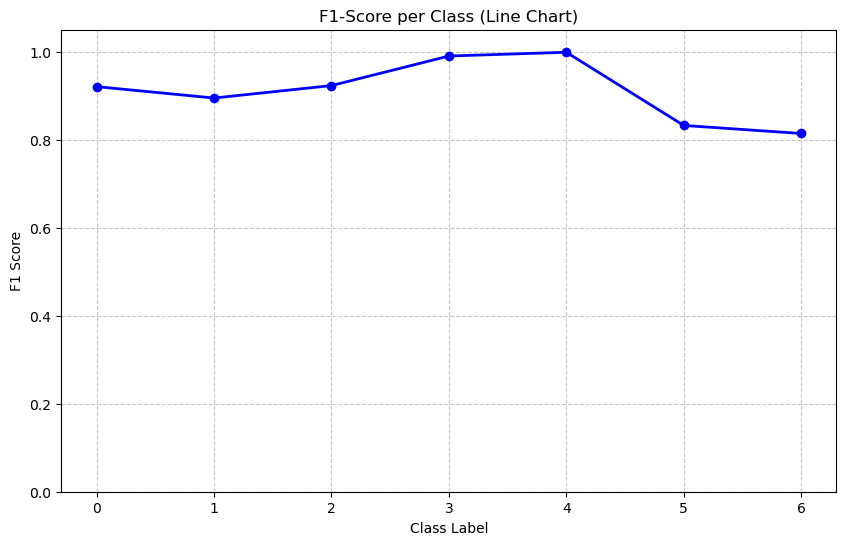

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd

# Classification raporunu al
report = classification_report(y_test, y_pred, output_dict=True)

# Sadece sınıflar için f1-score'ları al
f1_scores = {label: metrics['f1-score'] for label, metrics in report.items() if label.isdigit()}

# DataFrame'e dönüştür
f1_df = pd.DataFrame(list(f1_scores.items()), columns=['Class', 'F1 Score'])

# Sıralı hale getir
f1_df = f1_df.sort_values('Class')

# Çizgi grafik
plt.figure(figsize=(10, 6))
plt.plot(f1_df['Class'], f1_df['F1 Score'], marker='o', linestyle='-', color='blue', linewidth=2)
plt.title('F1-Score Sınıflara Göre')
plt.xlabel('Class Label')
plt.ylabel('F1 Score')
plt.ylim(0, 1.05)
plt.xticks(f1_df['Class'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [43]:
import pickle

# Modeli kaydet
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)


In [44]:
# Özellik isimlerini kaydet
feature_names = X.columns.tolist()

with open("xgb_feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)


In [45]:
# Özellik önemini al
importances = xgb.feature_importances_

# DataFrame oluştur
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# CSV olarak kaydet
importance_df.to_csv("xgb_feature_importances.csv", index=False)


In [46]:
train_scaled.to_csv("nobeyesdad_cleaned_scaled.csv", index=False)
